
# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint


#### To be done in the Lab

The objective of this experiment is to study the effect of different features on Multi-class classification.

In this experiment, we will use the CIFAR-10 dataset consists of 60,000 32x32 colour images in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images.

They are in a particular python-specific format called pickle. You need not worry about the format's internals, as the site has given the code needed to read such files. The code is given in the first code block below.

**The code returns the contents of each data file as a dictionary**.

There are 8 files in the cifar-10 directory.

    1. batches.meta

    2. data_batch_1

    3. data_batch_2	

    4. data_batch_3

    5. data_batch_4	

    6. data_batch_5

    7. readme.html

    8. test_batch

We will take a peek at these files.

### DataSource

https://www.cs.toronto.edu/~kriz/cifar.html

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P19A06E_test" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "981234567" #@param {type:"string"}


In [0]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()
  
notebook="BLR_M1W4_SAT_EXP_2" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week3/Exp3/AIML_DS_CIFAR-10_STD.zip")
    ipython.magic("sx unzip AIML_DS_CIFAR-10_STD.zip")
    print ("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "id" : Id, "file_hash" : file_hash, "notebook" : notebook}

      r = requests.post(url, data = data)
      print("Your submission is successful. Ref:", submission_id)
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


In [0]:
# Importing required packages
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io as sio
import itertools
import operator
import random
import collections
from scipy import stats
from sklearn.metrics import accuracy_score

In [0]:
# Special function to read special files
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

**data**  - a 10,000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.

**labels** -  a list of 10,000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.

### Visualizing the images in CIFAR-10 Dataset
1. Here get_data unpickles the CIFAR Dataset and stores the data as 10000*3072 dimension in array X and labels as 10000*1 dimension in array Y. 
2. Visualize function shows the image corresponding to id number.

In [0]:
# Function to load the data
def get_data(file):
    dict = unpickle(file)
    X = np.asarray(dict['data']).astype("uint8")
    Y = np.asarray(dict['labels'])
    names = np.asarray(dict['filenames'])
    list_class=(unpickle("AIML_DS_CIFAR-10_STD/batches.meta")['label_names'])
    return X,Y,names,list_class
                     
# Function to visualize the data

def visualize_image(X, Y, names, image_id):
    rgb = X[image_id,:]
    img = rgb.reshape(3, 32, 32).transpose([1, 2, 0])
    print(img.shape)
    plt.imshow(img)
    plt.title(names[image_id])
    plt.show()

Class = airplane
(32, 32, 3)


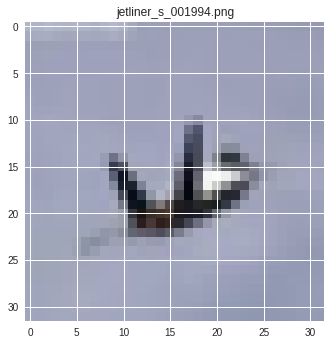

In [0]:
# Read image
X, Y, names, classes = get_data("AIML_DS_CIFAR-10_STD/data_batch_3")
# Visualize the 10th image
pick = 14
print("Class =",classes[Y[pick]])
visualize_image(X, Y, names, pick)

We shall run a linear classifier. You can look at the code that calculates weights for the optimal line in "perceptron_sgd".

The perceptron is an algorithm for supervised learning of binary classifiers. It is an artificial neuron conceived as a model of biological neurons, which are the elementary units in an artificial neural network. An artificial neuron is a linear combination of certain (one or more) inputs and a corresponding weight vector.

In [0]:
## Linear classifier code -
# code to estimate optimal linear boundary,
# classify train data by estimating the optimal linear boundary,
# predict labels based on linear boundary,
# and compute the accuracy of the classification

# code to estimate optimal linear boundary (can ignore for now),
def perceptron_sgd(X, Y):
    w = np.zeros(len(X[0]))
    eta = 0.01 # learning rate
    epochs = 100
    for t in range(epochs):
        if (t+1) % 50 == 0:
            print("Running Epoch #", t+1)
            # print("acc:", compute_accuracy(predict(X[:, :-1], w), Y))
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
        eta *= 0.75
    return w


In [0]:
# classify train data by estimating the optimal linear boundary,
def classify(train_feat, train_labels):
    ## mapping first label to -1 and second to +1
    labels = np.sort(np.unique(train_labels))
    lmap = {labels[0] : -1, labels[1] : 1}
    l = [lmap[i] for i in train_labels]     
    ## appending 1 to train features
    add_one2train = np.ones((len(train_feat), 1))
    append_train_features = np.hstack((np.asarray(train_feat), add_one2train))
    w = perceptron_sgd(append_train_features, l)
    return w


In [0]:
# predict labels based on linear boundary,
def predict(features, w):
    ##appending 1 to test features
    add_one = np.ones((len(features),1))
    append_features = np.hstack((np.asarray(features), add_one))
    pred = np.dot(append_features, w)
    return pred

In [0]:

# compute the accuracy of the classification
def compute_accuracy(pred, test_labels):
    # To make it general, let us find the unique set of labels in test_labels
    # (could be "apples" and "oranges", or "1" and "2"),
    labels = np.sort(np.unique(test_labels))
    # and then assign -1 and 1 to these unique labels
    lmap = {labels[0] : -1, labels[1] : 1}
    # Let's now convert the labels to -1 and 1
    l = [lmap[i] for i in test_labels]
    # Let us find the accuracy
    p = []
    for i in range(len(pred)):
        p.append(1 if pred[i] >= 0 else -1)
    acc = np.mean(np.asarray(p) == np.asarray(l))
    return acc

### Feature type 1: Raw Intensity values of RGB 
Use Intensity values of RGB as intensity features. For this use the raw intensity features extracted above.

In [0]:
## Unpickling the data and labels from CIFAR-10 Dataset,
## and Preparing the raw features for training and test data.

X_train = []
Y_train = []
# Read all training features and labels
for j in "12345": 
    batch_file = 'AIML_DS_CIFAR-10_STD/data_batch_'+ j
    x_train, y_train, names_train, classes_train = get_data(batch_file)
    X_train.extend(x_train)
    Y_train.extend(y_train)

X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

# Read all test features and labels
X_test, Y_test, names_test, classes_test = get_data("AIML_DS_CIFAR-10_STD/test_batch")

### Feature type 2: Hand crafted features
For this we extracted 9 dimension feature for each image. Feature consist of min,max and mean intensity values for RGB channel.

In [0]:
## Hand crafted features. For this we extracted 9 dimension feature for each image.
## Feature consist of min, max and mean intensity values for RGB channel.

# Extract min, max and mean of R, G, and B in each image
# in train
def extract_RGB_min_max_mean(X):
    R, G, B = 1024, 2048, 3072
    R_min = np.reshape(np.min(X[:, :R], axis=1), (len(X), 1))
    R_max = np.reshape(np.max(X[:, :R], axis=1), (len(X), 1))
    R_mean = np.reshape(np.mean(X[:, :R], axis=1), (len(X), 1))
    G_min = np.reshape(np.min(X[:, R:G], axis=1), (len(X), 1))
    G_max = np.reshape(np.max(X[:, R:G], axis=1), (len(X), 1))
    G_mean = np.reshape(np.mean(X[:, R:G], axis=1), (len(X), 1))
    B_min = np.reshape(np.min(X[:, G:B], axis=1), (len(X), 1))
    B_max = np.reshape(np.max(X[:, G:B], axis=1), (len(X), 1))
    B_mean = np.reshape(np.mean(X[:, G:B], axis=1), (len(X), 1))
    return np.hstack((R_min, R_max, R_mean, G_min, G_max, G_mean, B_min, B_max, B_mean))


### Feature-type3: PCA Features
Use PCA to reduce features high dimensionality features into low dimansionality features

In [0]:
## apply pca
from sklearn.decomposition import PCA

def extract_eigenvectors(k, X_train):
    pca = PCA(n_components=k)
    pca.fit(X_train)
    eigen_vectors = pca.components_
    return eigen_vectors, pca

def make_pca_features(eigen_vectors, X):
    return np.transpose(np.dot(eigen_vectors, np.transpose(X)))

### Feature type-4: Deep Features

In [0]:
### Loading the features
features = sio.loadmat('AIML_DS_CIFAR-10_STD/cifar10_deep_features.mat')

In [0]:
# Extracting the deep features into training and testing
deep_features_train = features['x_train']
deep_labels_train = np.squeeze(np.transpose(features['y_train']))
deep_features_test = features['x_test']
deep_labels_test = np.squeeze(np.transpose(features['y_test']))
print(deep_features_train.shape, deep_labels_train.shape, deep_features_test.shape, deep_labels_test.shape)

(50000, 512) (50000,) (10000, 512) (10000,)


 let us move onto multi-class classification. We shall do this by training a binary classifier for every pair of classes, and take a majority vote on the classes obtained.

Let us first summarize all the features we have:

In [0]:
# Raw features
print(X_train.shape, X_test.shape)

(50000, 3072) (10000, 3072)


In [0]:
# Extract hand features for full training and test sets
head_features_train = extract_RGB_min_max_mean(X_train)
head_features_test = extract_RGB_min_max_mean(X_test)

In [0]:
print(head_features_train.shape, head_features_test.shape)

(50000, 9) (10000, 9)


In [0]:
# Extract pca features for full training and test sets
# Make pca features, with k=100
k = 200
eigen_vectors, pca_object = extract_eigenvectors(k, X_train)
pca_features_train = make_pca_features(eigen_vectors, X_train)
pca_features_test = make_pca_features(eigen_vectors, X_test)

### Summarizing the extracted features:

1. Raw Features: `(X_train, Y_train, X_test, Y_test)`
2. Hand made features: `(hand_features_train, Y_train, hand_features_test, Y_test)`
3. PCA Features: `(pca_features_train, Y_train, pca_features_test, Y_test)`
4. Deep Features (VGG): `(deep_features_train, deep_labels_train, deep_features_test, deep_labels_test)`
                  
So we can choose any one of these 4 types of features, and train multiclass classifiers.

## Find accuracies with multi-class classification:

The code for multiclass classification is provided below, and the classifier can be called using `multiclass_classification(train_features, train_labels, test_features, test_labels)`.

In [0]:

def extract_two_classes(data, x,y):
    xtrain = []
    ytrain = []
    merged = []
    merged.extend(data[x])
    merged.extend(data[y])
    random.shuffle(merged)
    xtrain = list(zip(*merged))[0]
    ytrain = list(zip(*merged))[1]
    return xtrain, ytrain
  
def oneVsone(data, num_classes, test_sample):
    weight = []
    prediction = []
    for i, j in list(itertools.combinations(range(num_classes), 2)):
        print("Training for classes", i, j)
        xtrain, ytrain = extract_two_classes(data, i,j)
        w = classify(xtrain, ytrain)
        weight.append((w,(i,j)))
        pred = []
        preds = predict(test_sample, w)
        for p in predict(test_sample, w):
            if p > 0:
                pred.append(j)
            else:
                pred.append(i)
        prediction.append(pred)
        res = stats.mode(np.asarray(prediction))[0]
    return np.squeeze(res)

# classify train data by estimating the optimal linear boundary,
def classify(train_feat, train_labels):
    ## mapping first label to -1 and second to +1
    labels = np.sort(np.unique(train_labels))
    lmap = {labels[0] : -1, labels[1] : 1}
    l = [lmap[i] for i in train_labels]     
    ## appending 1 to train features
    add_one2train = np.ones((len(train_feat), 1))
    append_train_features = np.hstack((np.asarray(train_feat), add_one2train))
    w = perceptron_sgd(append_train_features, l)
    return w
  
  
def multiclass_classification(X_train, Y_train, X_test, Y_test):

    ## Train features and labels you want to use
    xtrain = X_train
    ytrain = Y_train
    ## Test features and labels you want to check on
    xtest = X_test
    ytest = Y_test

    l = zip(xtrain,  ytrain)
    #L.sort(key=lambda x: x[1])
    L = sorted(l, key=lambda x: x[1])

    it = itertools.groupby(L, operator.itemgetter(1))
    All_classes = []

    for key, subiter in it:
#         print ('Class:', key)
        data = []
        for item in subiter:
            data.append(item)
        All_classes.append(data)

    pred = oneVsone(All_classes, len(np.unique(Y_train)), xtest)
    print(accuracy_score(ytest, pred))

Replace `train_features`, `train_labels`, `test_features` and `test_labels` with the variables of your choice from the 4 above (raw, hand-crafted, pca, deep), and compare the accuracies.

In [0]:
# FEATURES & LABELS
train_features = ??
train_labels = ??
test_features = ??
test_labels = ??

In [0]:
multiclass_classification(train_features, train_labels, test_features, test_labels)

## In case we want to use sklearn's library for *faster* multi-class linear classification:

In [0]:
actual_labels = np.array([(i, j) for i in range(10) for j in range(i+1, 10)]).T

print(actual_labels)

def extract_2classes_with_binary_labels(i, j, X, Y):
    # Select class #0
    X_0 = X[Y == i]
    Y_0 = np.zeros((len(X_0)))
    # Select class #1
    X_1 = X[Y == j]
    Y_1 = np.ones((len(X_1)))
    # Join the two classes to make the set
    X_2classes = np.vstack((X_0, X_1))
    Y_2classes = np.append(Y_0, Y_1)
    return X_2classes, Y_2classes

# one-vs-one classifier
from sklearn import linear_model
def one_vs_one_classifier(train_features, train_labels):
    clf = linear_model.SGDClassifier(random_state=1)
    clf.fit(train_features, train_labels)
    return clf


def multiclass_classify_using_sklearn(X_train, Y_train, X_test, Y_test):
    
    classifiers = []
    
    # For each pair of classes:
    for i in range(0, 9):
        for j in range(i+1, 10):
            print("Training pair of classes:", i, j)
            
            # Extract the train features and labels of the two classes
            train_features, train_labels = extract_2classes_with_binary_labels(i, j, X_train, Y_train)
            
            # Let us make each one-vs-one classifier
            # Train the classifier on these features and labels
            clf = one_vs_one_classifier(train_features, train_labels)
            classifiers.append(clf)
    
    # Find each classifier's prediction
    predicted_classes_from_all_classifiers = np.zeros((len(X_test), len(classifiers)), dtype=int)
    for c, clf in enumerate(classifiers):
        preds = np.asarray(clf.predict(X_test), dtype=int)
        predicted_classes_from_all_classifiers[:, c] = actual_labels[preds, c]

    # Take majority vote for each sample
    predicted_classes = []
    for p in predicted_classes_from_all_classifiers:
        predicted_classes.append(np.argmax(np.bincount(p)))
    
    # Find accuracy
    test_accuracy = np.mean(predicted_classes == Y_test)
    print("Test accuracy: ", test_accuracy)

In [0]:
# FEATURES & LABELS
train_features = ??
train_labels = ??
test_features = ??
test_labels = ??

In [0]:
multiclass_classify_using_sklearn(train_features, train_labels, test_features, test_labels)

### Summary

1. We have seen how to extract the features from images using different techniques namely Raw intensity using RGB, hand-crafted features, PCA and Deep features.
2. We have learnt how to perform Binary-Class Classification and Multi-Class Classification. 

#### For more information

https://medium.com/100-days-of-algorithms/day-92-pca-bdb66840a8fb

https://towardsdatascience.com/what-the-hell-is-perceptron-626217814f53

### Please answer the questions below to complete the experiment:




In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Test" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [0]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful. Ref: 2805
